# Скрипты

Скрипт можно использовать разными способами:

- Если вам нужно выполнить код один раз или выполнять его очень редко (от случая к случаю), вы можете запустить скрипт вручную из командной строки.

- Если вы, например, написали на Python серверную часть веб-сайта и хотите, чтобы ваш код мог в любое время обрабатывать запросы, вы захотите запустить его как фоновый процесс.

А что делать, если вам нужно, чтобы ваш скрипт запускался иногда? Каждую пятницу, 13-го? В день рождения супруга (или супруги)? Или просто каждый час?

В этом случае вам нужен автоматический запуск скриптов, или, как часто его называют программисты, запуск по крону — от английского акронима Cron (англ. Command Run ON) — названия системы для автоматического запуска программ и скриптов на сервере в определённое время.

### Автоматический запуск может понадобиться, например:

- если вы хотите с определённой периодичностью скачивать новую информацию с сайтов, например выполнять парсинг новостей для последующего анализа (как мы уже знаем, этот процесс называется web-scraping);

- если ваш скрипт должен следить за курсом акций и каждую минуту делать запрос по API, чтобы получить новые котировки;

- если вы написали обучающую платформу и вам нужно каждый час проверять, кто из студентов приступил к занятиям и насколько успешно продвигается их обучение;

- если у вас есть 500 вендинговых автоматов по продаже солнечных очков и каждые пять минут вы должны опрашивать все автоматы, чтобы узнать, не закончились ли очки.

Примеров может быть очень много. В каждом, даже небольшом, проекте обычно есть 5-10 скриптов, которые с определённой периодичностью обновляют сертификаты доменов, очищают место на диске, считают статистику, генерируют отчёты и так далее. Давайте научимся настраивать запуск этих скриптов в соответствии с задачами, которые стоят перед вами.

# Как настроить автоматический запуск

Во всех операционных системах есть встроенные средства запуска программ по расписанию. Однако можно задать расписание запуска необходимых вам функций на языке Python внутри скрипта.

Исполняемый по расписанию код часто называют задачей (англ. task). Для планирования задач в Python есть несколько библиотек, среди которых — популярный и простой в использовании модуль schedule (c англ. расписание). Он позволяет запускать код как с определённым интервалом, так и в заданное время.

Модуль schedule не входит в стандартную библиотеку Python, поэтому его необходимо установить:

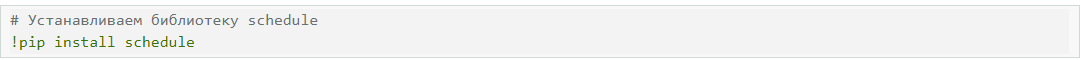

Для того чтобы у нас появилась возможность использовать модуль в коде, импортируем его:

In [1]:
import schedule # Импортируем модуль schedule

Теперь можно приступать к работе!

# Постановка задачи

Рассмотрим вариант автоматического запуска простой функции, которая выводит на экран короткое сообщение:

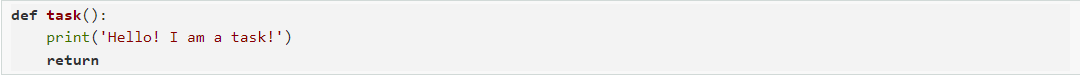

Предположим, что мы хотим, чтобы функция запускалась через определённые интервалы времени, а именно каждые 15 минут.

Для запуска задачи через определённые интервалы времени в модуле schedule используется метод every(), который получает в качестве единственного аргумента число, указывающее, как часто следует запускать код.

Далее вызывается метод, определяющий единицы измерения промежутков времени, через которые будет выполняться функция. В нашем примере это минуты. Вот как будет выглядеть итоговый код:



Если бы мы хотели запускать задачу, например, каждый час, то могли бы написать:



In [9]:
def task(): 
    print('Hello! I am a task!') 
    return 

schedule.every(15).minutes.do(task)

Every 15 minutes do task() (last run: [never], next run: 2024-10-19 15:06:37)

# Выполнение функции

После того как мы создали нашу функцию и определились со временем её запуска, мы можем запустить наш менеджер расписания (schedule). Для этого надо создать бесконечный цикл. Да-да, именно так, ведь скрипт должен выполняться постоянно, чтобы постоянно проверять, не пришло ли время снова выполнить задачу.

Внутри цикла мы будем вызывать особый метод run_pending() для объекта schedule, который будет проверять, нет ли задачи, которую пора выполнить.

После вызова метода run_pending() нужно будет сделать небольшую паузу, после которой можно будет снова проверять, не пришло ли время для выполнения какой-либо функции.

Давайте напишем этот код.

Для создания паузы мы будем использовать метод sleep из модуля time, поэтому наш код начнётся с импорта данного модуля:

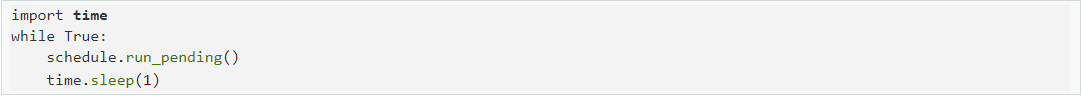

Всё готово — теперь можно сохранить файл и выполнить код.

Вот какой код в итоге получился:

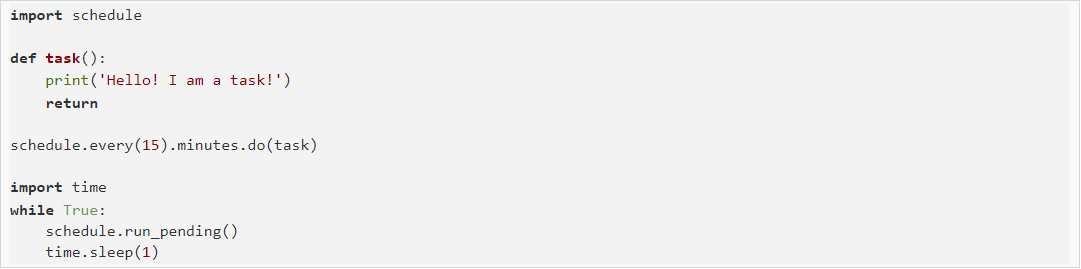

Этот код будет каждую секунду проверять, не надо ли выполнить какую-то задачу, и раз в 15 минут будет выводить на экран фразу: "Hello! I am a task!" Вывод сообщения будет повторяться до тех пор, пока вы не остановите выполнение скрипта.

In [12]:
import schedule

def task(): 
    print('Hello! I am a task!') 
    return

schedule.every(1).minutes.do(task)

import time 
while True: 
    schedule.run_pending() 
    time.sleep(1)

Hello! I am a task!
Hello! I am a task!
Hello! I am a task!
Hello! I am a task!
Hello! I am a task!
Hello! I am a task!
Hello! I am a task!


KeyboardInterrupt: 

NameError: name 'numpy' is not defined